In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict

class OrdUtils(object):
	
	regions = {'SE': ['ATL', 'DFW'],
	           'SW': ['LAX', 'LAS'],
	           'NW': ['SFO', 'DEN'],
	           'NE': ['JFK', 'EWR']
	           }
	
	def __init__(self):
		
		self.ord_flights = pd.read_csv('../data/ohare/01_2018_ORD_AIR_TFFX.csv', low_memory=False)
		
		#Split the data between inbound and outbound flights
		mask_from_ord = self.ord_flights.Origin == 'ORD'
		mask_to_ord = self.ord_flights.Origin != 'ORD'
		self.flights_from_ohare = self.ord_flights[mask_from_ord]
		self.flights_to_ohare = self.ord_flights[mask_to_ord]
		
		
		self.baselines = self.get_baselines()
	
	def get_baselines(self):
		ob_del = self.flights_from_ohare.DepDelayMinutes.mean()
		ib_del = self.flights_to_ohare.DepDelayMinutes.mean()
		
		ob_taxi_del = self.flights_from_ohare.TaxiOut.max()
		ib_taxi_del = self.flights_to_ohare.TaxiOut.max()
		
		#ALL OHARE TRAFFIC
		return {
			
			'ob_del': ob_del,
			'ib_del': ib_del,
			'ob_taxi_tm': ob_taxi_del,
			'ib_taxi_tm': ib_taxi_del
		}
	
	def get_ports(self, port, column_name, df):
		"""Filters a DF on a given airport. Convenience Method"""
		mask = (df[column_name] == port)
		return df[mask]
	
	def get_ib_delays(self, as_df=True):
		"""For flights that are arriving to O'hare, how long are the delays?"""
		ohare_ib_delays = defaultdict(float)
		
		for reg, airports in self.regions.items():
			
			for port in airports:
				ohare_ib_delays[port] = self.get_ports(port, 'Origin', self.flights_to_ohare).DepDelayMinutes.mean()
				
		ohare_ib_delays['ORD_AVG'] = self.baselines['ib_del']
		
		if not as_df:
			return ohare_ib_delays
		else:
			return pd.DataFrame(ohare_ib_delays, index=[0])
		
	def get_ob_delays(self, as_df=True):
		"""For flights that are leaving from O'hare, how long are the delays?"""
		
		ohare_outb_delays = defaultdict(float)
	
		for reg, airports in self.regions.items():
		
			for port in airports:
				ohare_outb_delays[port] = self.get_ports(port, 'Dest', self.flights_from_ohare).DepDelayMinutes.mean()
				
		ohare_outb_delays['ORD_AVG'] = self.baselines['ob_del']
		
		if not as_df:
			return ohare_outb_delays
		else:
			return pd.DataFrame(ohare_outb_delays, index=[0])
	
	def get_mini_ob_flights(self):
		return self.flights_from_ohare[['DepDelay', 'Reporting_Airline', 'Dest', 'ArrDelay', 'Quarter', 'DayOfWeek']]


In [28]:
faa = OrdUtils()


In [29]:
faa.get_mini_ob_flights()

,DepDelay,Reporting_Airline,Dest,ArrDelay,Quarter,DayOfWeek
10,-3.0,UA,SFO,-5.0,1,6
13,-2.0,UA,BWI,-12.0,1,6
15,-6.0,UA,CVG,-16.0,1,6
19,5.0,UA,DEN,-12.0,1,6
23,-2.0,UA,TPA,-12.0,1,6
26,-7.0,UA,MSP,-23.0,1,6
27,-7.0,UA,CLE,-18.0,1,6
28,12.0,UA,BWI,-1.0,1,6
29,-3.0,UA,IAD,-8.0,1,6
32,-5.0,UA,MSP,-24.0,1,6


In [5]:
faa.get_ib_delays()

,ATL,DFW,LAX,LAS,SFO,DEN,JFK,EWR,ORD_AVG
0,12.029173,8.728926,6.320783,6.072973,10.213693,6.767635,16.84492,11.22381,15.586941


In [ ]:
faa.

In [80]:
import seaborn as sns

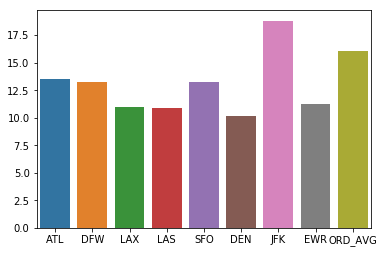

In [82]:
sns.barplot(data=faa.get_ob_delays())

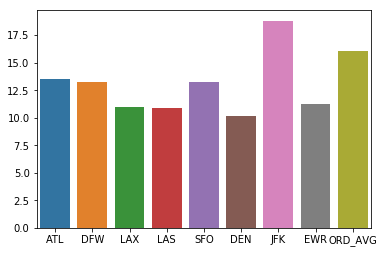

In [83]:
sns.barplot(data=faa.get_ob_delays())

Index(['index', 0], dtype='object')

In [59]:
nw_fmt = nw_fmt.rename(columns={'index': 'Airport', 0: 'Minutes Delayed'})

In [63]:
nw_fmt

,Airport,Minutes Delayed
0,ATL,13.496000
1,DFW,13.214035
2,LAX,10.989458
3,LAS,10.849462
4,SFO,13.217391
5,DEN,10.203742
6,JFK,18.811111
7,EWR,11.246787
8,ORD,16.095761
